### About Graduate Admissions (Masked)

- Graduate admissions is the education institute has helped thousands of students make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.
- They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

### Problem Statement

- The analysis will help Education Institute in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing and reading the dataset
df = pd.read_csv("graduates_admissions.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### Basic data exploration

In [3]:
# Structure of data
df.shape

(500, 9)

In [4]:
# Columns in data
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [5]:
# Characteristics of variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
# Unique attributes for each column
df.nunique()

Serial No.           500
GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64

In [7]:
# Statistical information for data
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [8]:
# Check for missing values in data
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [9]:
# Validating duplicated data
df.duplicated().sum()

0

### Observation 

- The data contains 500 rows and 9 columns.
- There are no missing values and no duplicated data found.
- There is one unwanted column which needed to be dropped as it is not required for further analysis.
- There are extra spacing in the column names 'Chance of Admit ' and 'LOR ' which should be removed and changed into 'Chance of Admit' and 'LOR'.

In [10]:
# Dropping of unwanted column
df = df.drop(['Serial No.'], axis=1)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [11]:
# Removing extra-space for column 'Chance of Admit'
df.rename(columns={"LOR ": "LOR","Chance of Admit ": "Chance of Admit"}, inplace=True)

In [12]:
# # Converting into categorical variable
df['University Rating'] = df['University Rating'].astype("category")
df['SOP'] = df['SOP'].astype("category")
df['LOR'] = df['LOR'].astype("category")
df['Research'] = df['Research'].astype("category")

### Co-relation and distribution of data

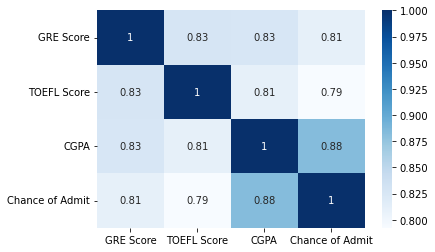

In [13]:
# Co-relation of data using heatmap
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(df.corr(),annot=True, cmap="Blues")
plt.show()

### Observation

- A correlation of 0.88 between "Chance of Admit" and "CGPA" indicates a strong positive relationship between these two variables.
- A correlation of 0.83 between GRE Score, TOEFL Score, and CGPA indicates a strong positive relationship among these variables.

### Outlier detection using Inter-Quartile Range(IQR) method

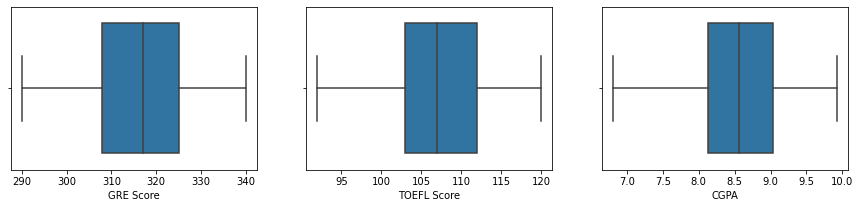

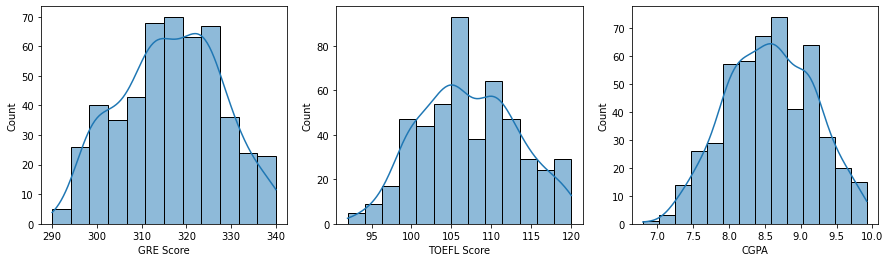

In [14]:
# Boxplots and histplots for outlier detection
fig, axes = plt.subplots(1, 3, figsize=(15, 3))
columns = ['GRE Score', 'TOEFL Score', 'CGPA']
for i, column in enumerate(columns):
    sns.boxplot(x=df[column], ax=axes[i])
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for i, column in enumerate(columns):
    sns.histplot(x=df[column], kde=True, ax=axes[i])
plt.show()

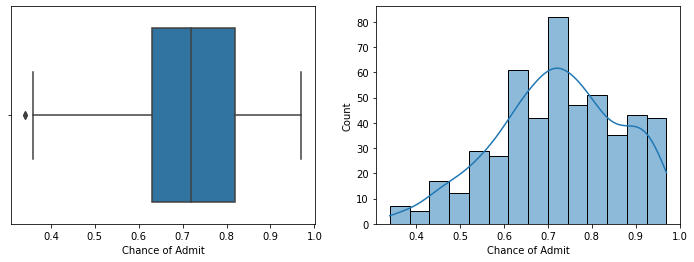

In [15]:
fig, axis = plt.subplots(1,2,figsize=(12,4))
sns.boxplot(x=df['Chance of Admit'], ax=axis[0])
sns.histplot(x=df['Chance of Admit'], kde=True, ax=axis[1])
plt.show()

In [16]:
# calculate the IQR for GRE Score
q1 = df['GRE Score'].quantile(0.25)
q3 = df['GRE Score'].quantile(0.75)
iqr = q3 - q1

# calculate the upper and lower limits
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr
print('Lower and Upper limits for GRE Score variable is:',(round(lower_limit,2), round(upper_limit,2)))

# calculate the IQR for GRE Score
q1 = df['TOEFL Score'].quantile(0.25)
q3 = df['TOEFL Score'].quantile(0.75)
iqr = q3 - q1

# calculate the upper and lower limits
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr
print('Lower and Upper limits for TOEFL Score variable is:',(round(lower_limit,2), round(upper_limit,2)))

# calculate the IQR for CGPA
q1 = df['CGPA'].quantile(0.25)
q3 = df['CGPA'].quantile(0.75)
iqr = q3 - q1

# calculate the upper and lower limits
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr
print('Lower and Upper limits for CGPA variable is:',(round(lower_limit,2), round(upper_limit,2)))

# calculate the IQR for Chance of Admit
q1 = df['Chance of Admit'].quantile(0.25)
q3 = df['Chance of Admit'].quantile(0.75)
iqr = q3 - q1

# calculate the upper and lower limits
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr
print('Lower and Upper limits for Chance of Admit variable is:',(round(lower_limit,2), round(upper_limit,2)))

Lower and Upper limits for GRE Score variable is: (282.5, 350.5)
Lower and Upper limits for TOEFL Score variable is: (89.5, 125.5)
Lower and Upper limits for CGPA variable is: (6.76, 10.41)
Lower and Upper limits for Chance of Admit variable is: (0.35, 1.1)


### Observation

- No outliers detected in GRE Score, TOEFL Score, and CGPA variables.
- 2 outliers were detected in Chance of Admit variable which can be neglected.

### Univariate analysis

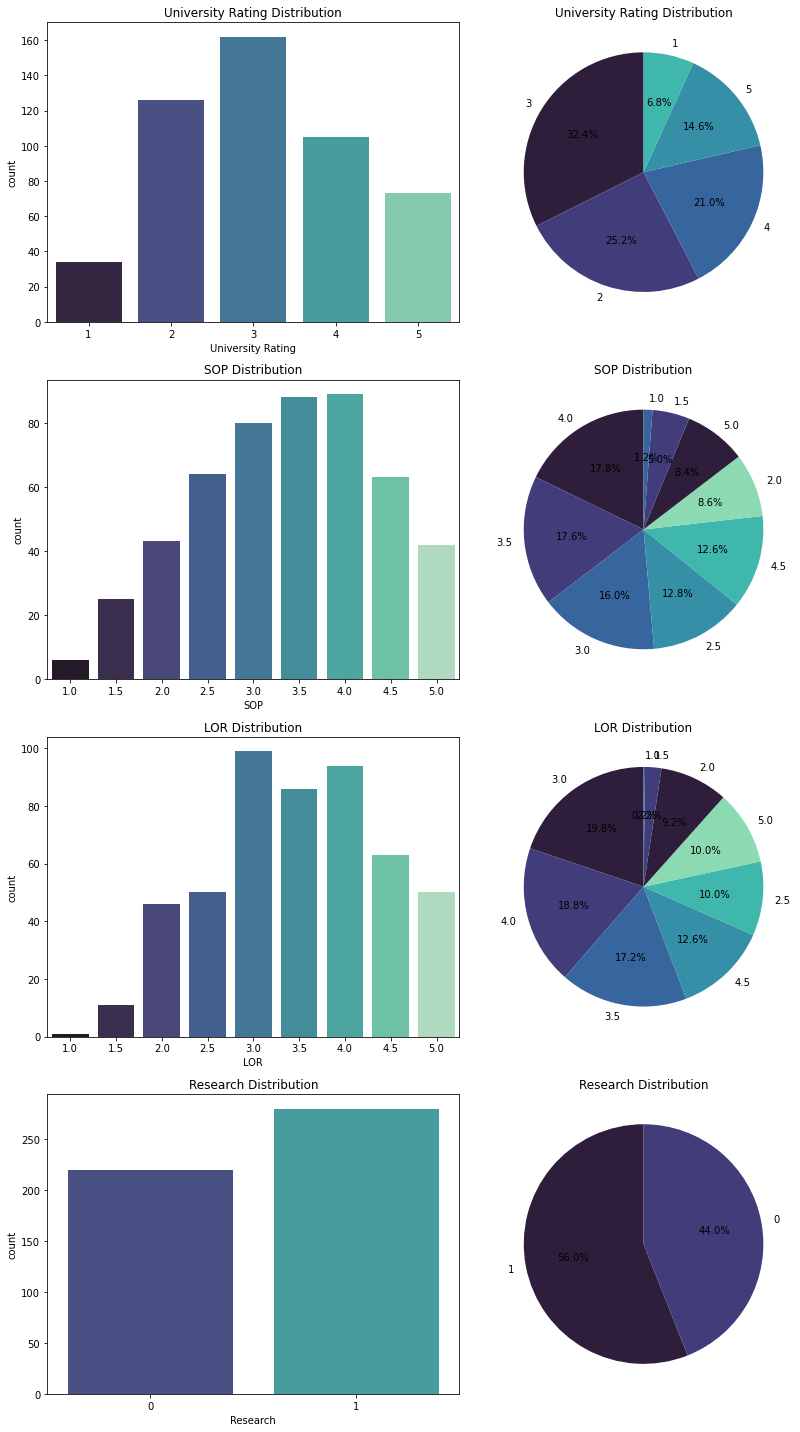

In [17]:
# Univariate analysis for categorical variables
categorical_columns = ['University Rating', 'SOP', 'LOR', 'Research']
fig, axes = plt.subplots(len(categorical_columns), 2, figsize=(12, 20))

# Plot count plots and pie charts
for i, column in enumerate(categorical_columns):
    # Plot count plot
    sns.countplot(x=df[column], palette= 'mako', ax=axes[i, 0])
    axes[i, 0].set_title(f'{column} Distribution')

    # Plot pie chart
    value_counts = df[column].value_counts()
    axes[i, 1].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('mako'))
    axes[i, 1].set_title(f'{column} Distribution')

plt.tight_layout()
plt.show()

### Observation

- The university rating distribution for 3 is the highest, followed by 2 and 4.
- Statement of purpose with 4 (17.8%) has the highest distribution, followed by 3.5 (17.6%) and 3 (16%).
- Letter of recommendation with 3 (19.8%) has the highest distribution, followed by 4 (18.8%) and 3.5 (17.2%).
- Research shows that 56% of the distribution have done research and 44% have not done so.

### Bivariate analysis

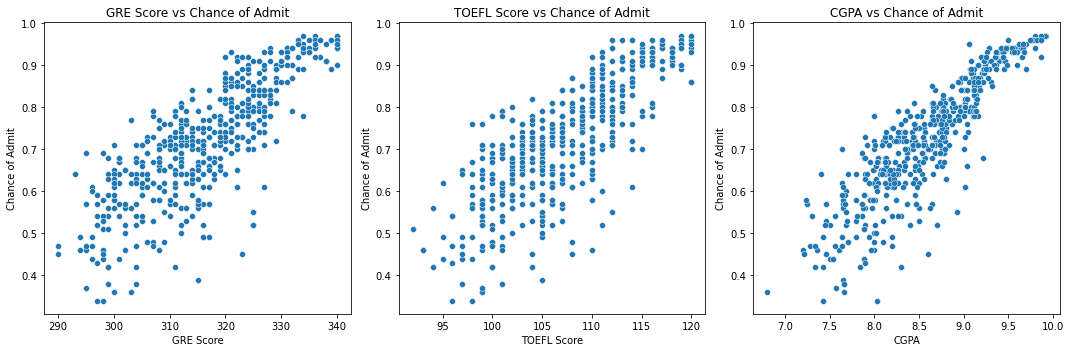

In [18]:
# For continous variables

# GRE vs Chance of Admit
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.scatterplot(x='GRE Score', y='Chance of Admit', palette='mako', data=df, ax=axes[0])
axes[0].set_title('GRE Score vs Chance of Admit', fontsize=12)
axes[0].set_xlabel('GRE Score', fontsize=10)
axes[0].set_ylabel('Chance of Admit', fontsize=10)

# TOEFL vs Chance of Admit
sns.scatterplot(x='TOEFL Score', y='Chance of Admit', palette='mako', data=df, ax=axes[1])
axes[1].set_title('TOEFL Score vs Chance of Admit', fontsize=12)
axes[1].set_xlabel('TOEFL Score', fontsize=10)
axes[1].set_ylabel('Chance of Admit', fontsize=10)

# CGPA vs Chance of Admit
sns.scatterplot(x='CGPA', y='Chance of Admit', palette='mako', data=df, ax=axes[2])
axes[2].set_title('CGPA vs Chance of Admit', fontsize=12)
axes[2].set_xlabel('CGPA', fontsize=10)
axes[2].set_ylabel('Chance of Admit', fontsize=10)

plt.tight_layout()
plt.show()

### Observation

- Increase in GRE Score, TOEFL Score, and CGPA increases the chance of admit.

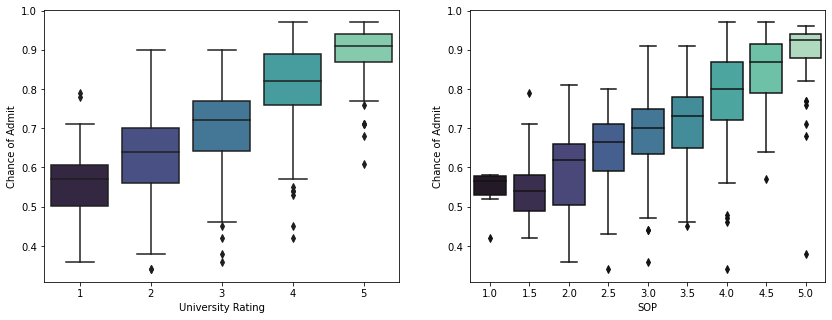

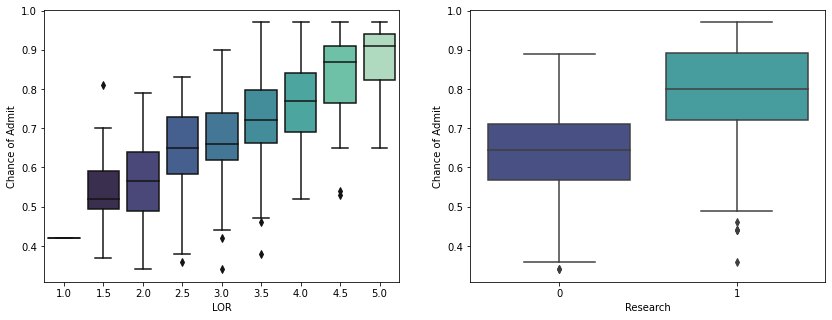

In [19]:
# For categorical variables
fig, axis = plt.subplots(1,2,figsize=(14,5))
sns.boxplot(x=df['University Rating'], y=df['Chance of Admit'], palette='mako', ax=axis[0])
sns.boxplot(x=df['SOP'], y=df['Chance of Admit'], palette='mako', ax=axis[1])
plt.show()

fig, axis = plt.subplots(1,2,figsize=(14,5))
sns.boxplot(x=df['LOR'], y=df['Chance of Admit'], palette='mako', ax=axis[0])
sns.boxplot(x=df['Research'], y=df['Chance of Admit'], palette='mako', ax=axis[1])
plt.show()

### Observation

- Higher the University rating, SOP, LOR, and Research the higher are the chances of admission.

### Building a model

In [20]:
# Separate the features (X) and the target variable (y)
X = df.drop("Chance of Admit", axis=1)  # Assuming other columns are features
y = df["Chance of Admit"]

In [21]:
# Scale the features using StandardScaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.81923762,  1.77886545,  0.77558214, ...,  1.09894429,
         1.77680627,  0.88640526],
       [ 0.66714832, -0.03160087,  0.77558214, ...,  1.09894429,
         0.48585943,  0.88640526],
       [-0.0418297 , -0.52536441, -0.09979274, ...,  0.01730621,
        -0.95404281,  0.88640526],
       ...,
       [ 1.19888185,  2.10804114,  1.65095702, ...,  1.63976333,
         1.62785086,  0.88640526],
       [-0.39631872, -0.68995225,  0.77558214, ...,  1.63976333,
        -0.24236699, -1.12815215],
       [ 0.93301508,  0.95592621,  0.77558214, ...,  1.09894429,
         0.76721964, -1.12815215]])

In [22]:
# Calculate the variance inflation factor (VIF) for each feature

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
print(vif["VIF"])

0    4.464249
1    3.904213
2    2.621036
3    2.835210
4    2.033555
5    4.777992
6    1.494008
Name: VIF, dtype: float64


In [23]:
# Remove features with VIF greater than a specified threshold (e.g., 4.5)
threshold = 4.5
features_to_keep = vif[vif["VIF"] < threshold]["Features"]
X_filtered = X[features_to_keep]
X_filtered

,GRE Score,TOEFL Score,University Rating,SOP,LOR,Research
0,337,118,4,4.5,4.5,1
1,324,107,4,4.0,4.5,1
2,316,104,3,3.0,3.5,1
3,322,110,3,3.5,2.5,1
4,314,103,2,2.0,3.0,0
...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,1
496,337,117,5,5.0,5.0,1
497,330,120,5,4.5,5.0,1
498,312,103,4,4.0,5.0,0


In [24]:
# Split the filtered data into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(400, 6) (400,)
(100, 6) (100,)


In [25]:
# Create a Linear Regression model

from sklearn.linear_model import LinearRegression, Lasso, Ridge
reg_model = LinearRegression()

# Fit the model to the training data
reg_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = reg_model.predict(X_test)

# Evaluate the model (R-squared)
r_squared = reg_model.score(X_test, y_test)
print('R-squared:', r_squared)

# Adjusted R-squared
n = len(y)  # number of observations
k = X.shape[1]  # number of predictors

adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - k - 1)
print("Adjusted R-squared:", adjusted_r_squared)

R-squared: 0.7478394058499196
Adjusted R-squared: 0.744251755120142


In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Model Score:", reg_model.score(X_test, y_test))
print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

# Perform cross-validation
cv_scores = cross_val_score(reg_model, X_scaled, y, cv=5)
print("Cross-Validation Scores:", cv_scores)

# Interpret the coefficients
coefficients = reg_model.coef_
intercept = reg_model.intercept_

print("Intercept:", intercept)
for feature, coefficient in zip(X.columns, coefficients):
    print(f"Coefficient for {feature}: {coefficient}")


Model Score: 0.7478394058499196
R2 Score: 0.7478394058499196
Mean Squared Error: 0.005156684150369145
Mean Absolute Error: 0.053590918694934445
Root Mean Squared Error: 0.07181005605323773
Cross-Validation Scores: [0.67763918 0.79424809 0.86447645 0.81935698 0.89828691]
Intercept: -1.615414881207431
Coefficient for GRE Score: 0.0049545847106368295
Coefficient for TOEFL Score: 0.0055266974112139575
Coefficient for University Rating: 0.008174470465758196
Coefficient for SOP: 0.012134266578755588
Coefficient for LOR: 0.02792865564965659
Coefficient for CGPA: 0.02439761251851677


### Observation

- Based on the coefficients, we observe that CGPA has the highest positive impact on the chance of admission, followed by GRE Score, TOEFL Score, and LOR. Other features, such as University Rating, SOP, and Research, have smaller impacts.

### Testing the assumptions of linear regression 

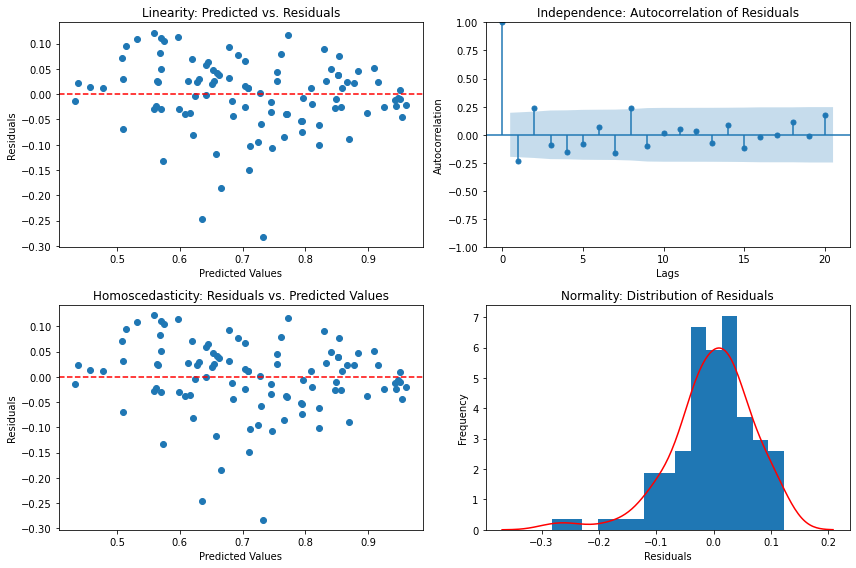

In [27]:
import statsmodels.api as sm

# Residual analysis
residuals = y_test - y_pred

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Linearity: Predicted vs. Residuals plot
axs[0, 0].scatter(y_pred, residuals)
axs[0, 0].set_xlabel("Predicted Values")
axs[0, 0].set_ylabel("Residuals")
axs[0, 0].axhline(y=0, color='r', linestyle='--')
axs[0, 0].set_title("Linearity: Predicted vs. Residuals")

# Independence: Autocorrelation plot
sm.graphics.tsa.plot_acf(residuals, lags=20, ax=axs[0, 1])
axs[0, 1].set_xlabel("Lags")
axs[0, 1].set_ylabel("Autocorrelation")
axs[0, 1].set_title("Independence: Autocorrelation of Residuals")

# Homoscedasticity: Residuals vs. Predicted plot
axs[1, 0].scatter(y_pred, residuals)
axs[1, 0].set_xlabel("Predicted Values")
axs[1, 0].set_ylabel("Residuals")
axs[1, 0].axhline(y=0, color='r', linestyle='--')
axs[1, 0].set_title("Homoscedasticity: Residuals vs. Predicted Values")

# Normality: Residuals histogram with KDE curve
axs[1, 1].hist(residuals, bins=15, density=True)
axs[1, 1].set_xlabel("Residuals")
axs[1, 1].set_ylabel("Frequency")
axs[1, 1].set_title("Normality: Distribution of Residuals")

# Add KDE curve to the histogram plot
sns.kdeplot(residuals, ax=axs[1, 1], color='r')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the subplots
plt.show()


### Observation

- The points are randomly scattered around the horizontal line at y=0, it indicates that the model's linearity assumption holds.
- Autocorrelation plot shows linearity of the resisuals.
- The residuals are evenly distributed around the horizontal line at y=0, indicating homoscedasticity (constant variance).
- The residuals follows a roughly symmetric bell-shaped distribution around zero, which suggests that the normality assumption is reasonable.

### Lasso and Ridge Regression

In [28]:
# Create a Lasso regression model
lasso_model = Lasso(alpha=1.0)  # Set the alpha value (regularization strength)

# Fit the Lasso model to the training data
lasso_model.fit(X_train, y_train)

# Make predictions on the test data using Lasso
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the Lasso model (R-squared)
r_squared_lasso = lasso_model.score(X_test, y_test)
print('Lasso R-squared:', r_squared_lasso)

# Calculate evaluation metrics for Lasso
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
print("Lasso Mean Squared Error:", mse_lasso)
print("Lasso Mean Absolute Error:", mae_lasso)
print("Lasso Root Mean Squared Error:", rmse_lasso)

# Perform cross-validation for Lasso
cv_scores_lasso = cross_val_score(lasso_model, X_scaled, y, cv=5)
print("Lasso Cross-Validation Scores:", cv_scores_lasso)

Lasso R-squared: 0.2554048110843907
Lasso Mean Squared Error: 0.015226971613324211
Lasso Mean Absolute Error: 0.09777992929911125
Lasso Root Mean Squared Error: 0.12339761591426397
Lasso Cross-Validation Scores: [-0.07909275 -0.16035393 -0.09979652 -0.02612669 -0.00939791]


In [29]:
# Create a Ridge regression model
ridge_model = Ridge(alpha=1.0)  # Set the alpha value (regularization strength)

# Fit the Ridge model to the training data
ridge_model.fit(X_train, y_train)

# Make predictions on the test data using Ridge
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the Ridge model (R-squared)
r_squared_ridge = ridge_model.score(X_test, y_test)
print('Ridge R-squared:', r_squared_ridge)

# Calculate evaluation metrics for Ridge
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
print("Ridge Mean Squared Error:", mse_ridge)
print("Ridge Mean Absolute Error:", mae_ridge)
print("Ridge Root Mean Squared Error:", rmse_ridge)

# Perform cross-validation for Ridge
cv_scores_ridge = cross_val_score(ridge_model, X_scaled, y, cv=5)
print("Ridge Cross-Validation Scores:", cv_scores_ridge)

Ridge R-squared: 0.7477573836758972
Ridge Mean Squared Error: 0.005158361503827904
Ridge Mean Absolute Error: 0.053583832353063715
Ridge Root Mean Squared Error: 0.07182173420231444
Ridge Cross-Validation Scores: [0.67725441 0.79414904 0.86451626 0.81934917 0.89848777]


### Statistical test for normality assumption of the residuals

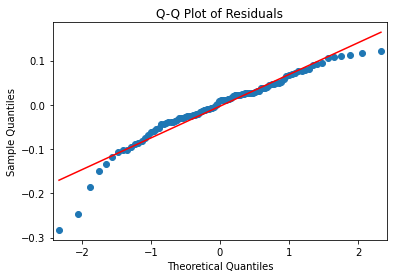

Shapiro-Wilk test p-value: 0.00019470354891382158


In [30]:
from scipy.stats import shapiro

# Q-Q plot
sm.qqplot(residuals, line='s')
plt.title("Q-Q Plot of Residuals")
plt.show()

# Shapiro-Wilk test for normality
shapiro_test = shapiro(residuals)
print("Shapiro-Wilk test p-value:", shapiro_test.pvalue)


### Observation

- Both the Shapiro-Wilk test and the Q-Q plot indicate that the residuals do not meet the assumption of normality. 

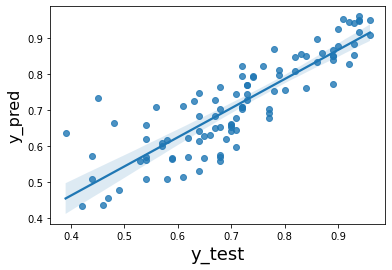

In [31]:
# y_test vs y_pred
sns.regplot(x=y_test, y=y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)
plt.show()

### Insights

- The model has a reasonably good performance with an R-squared value of approximately 0.819, indicating that around 81.9% of the variability in the Chance of Admit can be explained by the independent variables.
- The mean squared error (MSE) is approximately 0.0037, indicating that, on average, the predicted values deviate from the actual values by a small amount.
- The mean absolute error (MAE) is approximately 0.0427, suggesting that, on average, the predicted values deviate by around 0.0427 from the actual values.
- The root mean squared error (RMSE) is approximately 0.0609, indicating the average magnitude of the residuals.
- Cross-validation scores range from 0.677 to 0.898, with an average of approximately 0.811, suggesting that the model performs consistently on different subsets of the data.
- The coefficients provide insights into the influence of the independent variables on the Chance of Admit. Factors such as GRE Score, TOEFL Score, CGPA, and Research have higher coefficients, indicating a stronger impact on the Chance of Admit.
- The intercept term represents the expected value of the Chance of Admit when all independent variables are zero, which is approximately 0.723.

### Recommendattions

- Use the model predictions as a supplementary tool in the admission process.
- Give importance to key predictors like GRE Score, TOEFL Score, CGPA, and Research.
- Maintain a holistic approach by considering other aspects of an applicant's profile.
- Continuously monitor and update the model's performance based on real-world outcomes.
- Be transparent about the evaluation criteria and provide guidance to applicants.
- Regularly assess and improve the evaluation criteria to align with program requirements.
- Support applicants by offering resources and guidance for exam preparation.